# Step 5: Feature Engineering for NYC 311 Modeling

This notebook demonstrates the complete feature engineering pipeline for three modeling tracks:
1. **Forecast** - Time-series forecasting of ticket arrivals
2. **Triage** - Ticket prioritization at creation time
3. **Duration** - Survival modeling for time-to-close

All features are **leakage-safe** and use **H3-based spatial grouping**.


why LBM?


In [1]:
import os
import sys

PACKAGE_PATH = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, PACKAGE_PATH)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime

from src import preprocessing
from src import features
from src import config
from src import forecast

pd.set_option('display.max_columns', 50)
sns.set_style('whitegrid')
from importlib import reload

c:\Users\gorav\GitHub\nyc-311-service-requests\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Usage Instructions

This notebook uses the feature engineering module from `src/features.py`.

To run this notebook:
1. Ensure you have data in `data/landing/311-service-requests/`
2. Run `pip install -r requirements.txt` to install dependencies
3. Execute cells sequentially

For detailed documentation, see `src/FEATURE_ENGINEERING_README.md`


## Load Data

In [2]:
forecast_panel = pd.read_parquet(config.PRESENTATION_DATA_PATH + '/model_fitting_data.parquet')


## Fit Modesl

In [3]:
numerical_columns = config.NUMERICAL_COLUMNS

categorical_columns = config.CATEGORICAL_COLUMNS
horizons = [1]

### Fit Mean Models

In [4]:
bundle_mean = forecast.train_models(
    forecast_panel,
    numerical_columns,
    categorical_columns,
    horizons,
    'mean'
)

Training model for horizon 1
X shape pre-filtering: (547535, 29)
X shape post-filtering: (547535, 29)
Train dates [2009-12-29 00:00:00 to 2023-12-26 00:00:00], Test dates [2024-01-02 00:00:00 to 2025-07-29 00:00:00]
X training shape: (487161, 29)
X test shape: (60374, 29)
CV (neg_mean_absolute_error) scores: [-0.94076096 -0.6097193  -0.6403069  -0.6437102  -0.67708157 -0.7194397
 -0.7614965  -0.76723794 -0.75462297 -0.75051399 -0.71579421 -0.83070775
 -0.85251991 -0.838712  ]
CV mean: -0.7501874206680085
train metrics
  h=1: RMSE=1.149, MAE=0.722, Poisson Dev=1.091
test metrics
  h=1: RMSE=1.427, MAE=0.819, Poisson Dev=1.245



### Fit 90th Percentile Models

In [5]:
bundle_90 = forecast.train_models(
    forecast_panel,
    numerical_columns,
    categorical_columns,
    horizons,
    '90'
)

Training model for horizon 1
X shape pre-filtering: (547535, 29)
X shape post-filtering: (547535, 29)
Train dates [2009-12-29 00:00:00 to 2023-12-26 00:00:00], Test dates [2024-01-02 00:00:00 to 2025-07-29 00:00:00]
X training shape: (487161, 29)
X test shape: (60374, 29)
CV (neg_mean_absolute_error) scores: [-1.7811236  -1.13071284 -1.21789995 -1.24946482 -1.28365383 -1.34046891
 -1.40886349 -1.44921458 -1.45070143 -1.43749619 -1.38314953 -1.46029557
 -1.6279459  -1.65699214]
CV mean: -1.419855913545089
train metrics
  h=1: RMSE=1.889, MAE=1.439, Poisson Dev=2.148
test metrics
  h=1: RMSE=2.183, MAE=1.575, Poisson Dev=2.321



### Fit 50th Percentile Models

In [6]:
bundle_50 = forecast.train_models(
    forecast_panel,
    numerical_columns,
    categorical_columns,
    horizons,
    '50'
)

Training model for horizon 1
X shape pre-filtering: (547535, 29)
X shape post-filtering: (547535, 29)
Train dates [2009-12-29 00:00:00 to 2023-12-26 00:00:00], Test dates [2024-01-02 00:00:00 to 2025-07-29 00:00:00]
X training shape: (487161, 29)
X test shape: (60374, 29)
CV (neg_mean_absolute_error) scores: [-0.67148251 -0.52453516 -0.55812136 -0.55755132 -0.60091443 -0.64750631
 -0.69668572 -0.6935404  -0.68249425 -0.67640293 -0.63036798 -0.76490841
 -0.76636594 -0.74993151]
CV mean: -0.6586291600026145
train metrics
  h=1: RMSE=1.256, MAE=0.650, Poisson Dev=6.384
test metrics
  h=1: RMSE=1.495, MAE=0.734, Poisson Dev=6.537



### Fit 10th Percentile Models

In [7]:
bundle_10 = forecast.train_models(
    forecast_panel,
    numerical_columns,
    categorical_columns,
    horizons,
    '10'
)

Training model for horizon 1
X shape pre-filtering: (547535, 29)
X shape post-filtering: (547535, 29)
Train dates [2009-12-29 00:00:00 to 2023-12-26 00:00:00], Test dates [2024-01-02 00:00:00 to 2025-07-29 00:00:00]
X training shape: (487161, 29)
X test shape: (60374, 29)
CV (neg_mean_absolute_error) scores: [-0.64399041 -0.62071694 -0.68087946 -0.67022948 -0.74957448 -0.82711016
 -0.9001661  -0.90094162 -0.87664467 -0.86474347 -0.77064431 -0.99798813
 -1.00320243 -0.97690138]
CV mean: -0.8202666462869447
train metrics
  h=1: RMSE=1.686, MAE=0.828, Poisson Dev=25.252
test metrics
  h=1: RMSE=2.034, MAE=0.930, Poisson Dev=26.026



### Save All Bundles

In [8]:
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
forecast.save_bundle(bundle_mean,  timestamp, 'lgb_mean.pkl')
forecast.save_bundle(bundle_90,  timestamp, 'lgb_90.pkl')
forecast.save_bundle(bundle_50,  timestamp, 'lgb_50.pkl')
forecast.save_bundle(bundle_10,  timestamp, 'lgb_10.pkl')

Model bundle saved to: c:\Users\gorav\GitHub\nyc-311-service-requests\models\20251006_015425\just_model\lgb_mean.pkl
Model bundle saved to: c:\Users\gorav\GitHub\nyc-311-service-requests\models\20251006_015425\just_model\lgb_90.pkl
Model bundle saved to: c:\Users\gorav\GitHub\nyc-311-service-requests\models\20251006_015425\just_model\lgb_50.pkl
Model bundle saved to: c:\Users\gorav\GitHub\nyc-311-service-requests\models\20251006_015425\just_model\lgb_10.pkl


## Evaluate Models

### Evaluate Mean Models

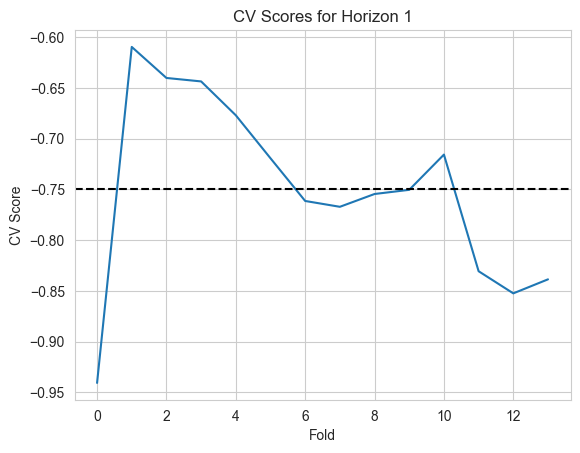

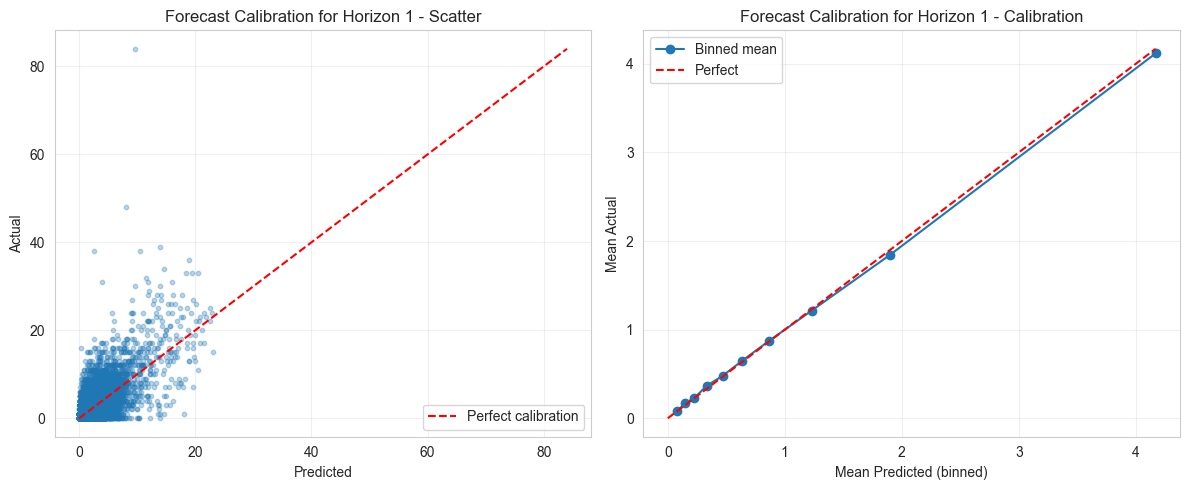

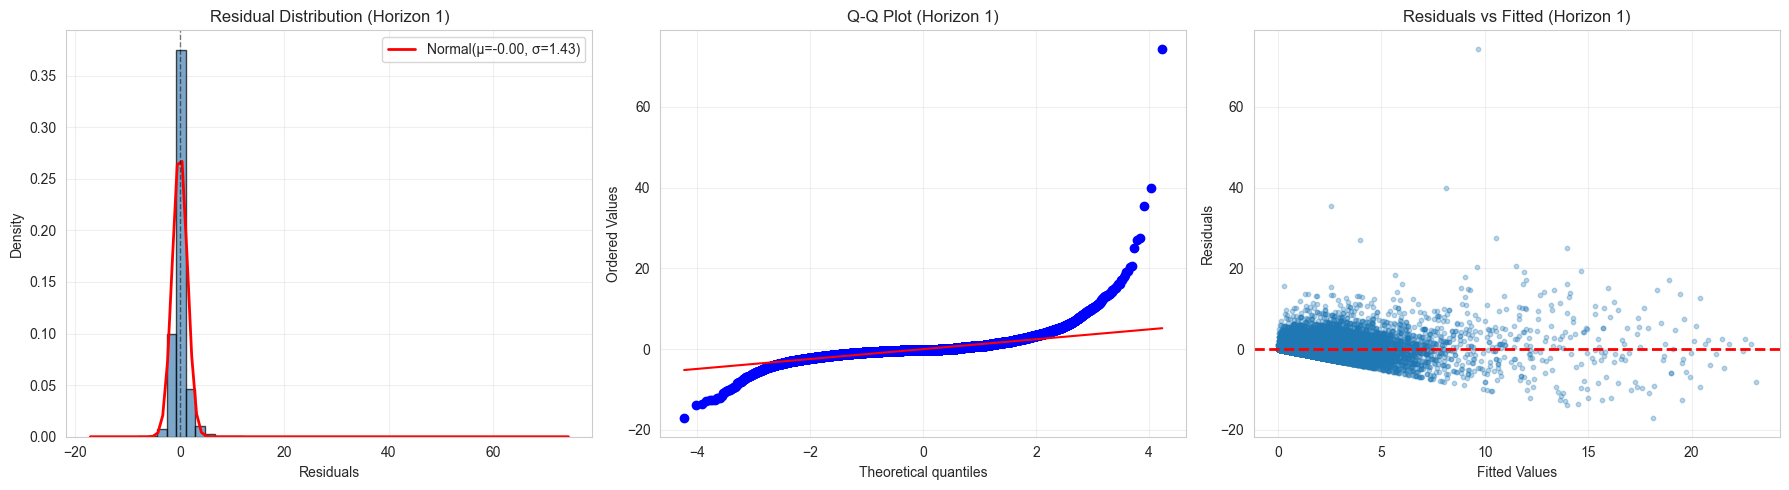


Horizon 1 - Residual Analysis
Residual Statistics:
  Mean: -0.0032
  Std Dev: 1.4273
  Median: -0.1800
  Skewness: 5.0641
  Kurtosis: 161.7139

Shapiro-Wilk Normality Test (n=5000):
  Statistic: 0.8062
  P-value: 5.4263e-61
  Interpretation: Residuals are NOT normally distributed (α=0.05)

Anderson-Darling Normality Test:
  Statistic: 3507.9795
  Critical Values: [0.576 0.656 0.787 0.918 1.092]
  Significance Levels: [15.  10.   5.   2.5  1. ]%

------------------------------------------------------------
Model Performance Metrics:
{'train': {'horizon': 1, 'rmse': 1.1490101593126776, 'mae': 0.7221750260247743, 'poisson_deviance': 1.090635751032836, 'n_samples': 487161}, 'test': {'horizon': 1, 'rmse': 1.427296115044854, 'mae': 0.8193493316745941, 'poisson_deviance': 1.2447995102922529, 'n_samples': 60374}}



In [9]:
reload(forecast)
forecast.evaluate_models(bundle_mean)

### Evaluate 90th Percentile Models

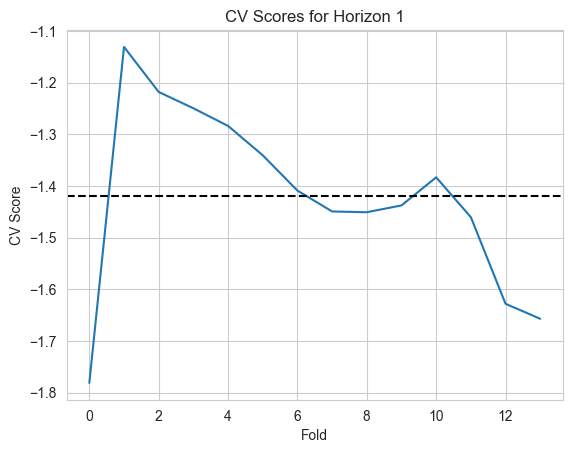

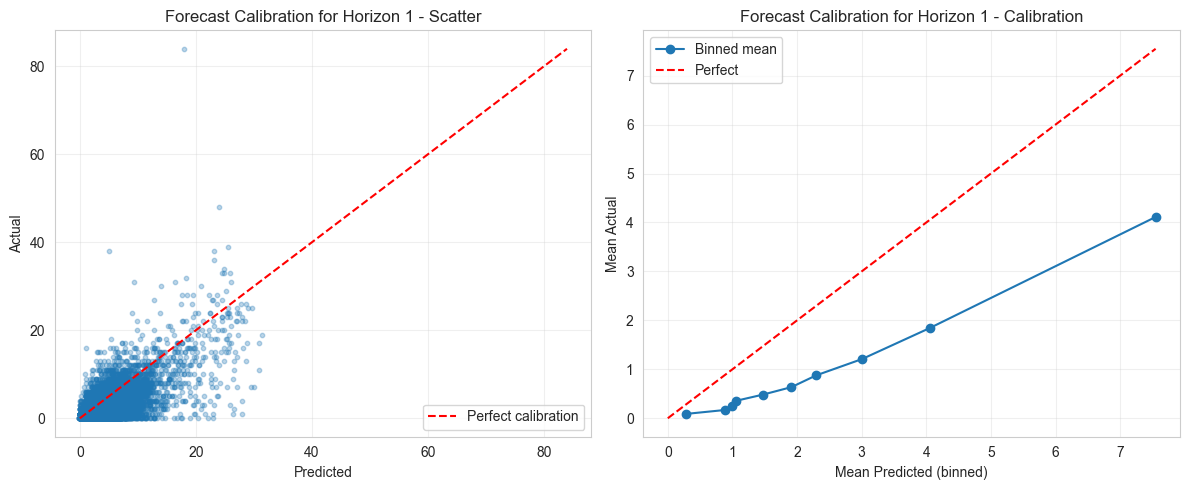

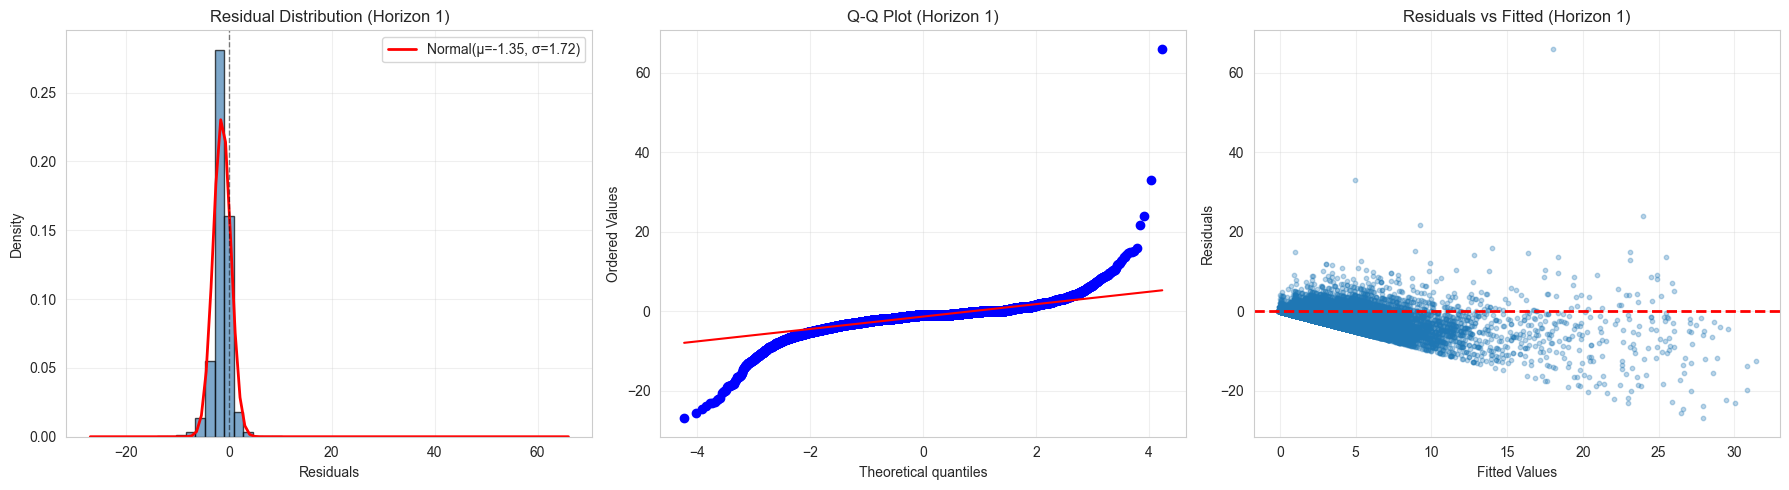


Horizon 1 - Residual Analysis
Residual Statistics:
  Mean: -1.3500
  Std Dev: 1.7151
  Median: -1.0217
  Skewness: -0.1584
  Kurtosis: 59.0043

Shapiro-Wilk Normality Test (n=5000):
  Statistic: 0.8663
  P-value: 3.2152e-54
  Interpretation: Residuals are NOT normally distributed (α=0.05)

Anderson-Darling Normality Test:
  Statistic: 1998.6057
  Critical Values: [0.576 0.656 0.787 0.918 1.092]
  Significance Levels: [15.  10.   5.   2.5  1. ]%

------------------------------------------------------------
Model Performance Metrics:
{'train': {'horizon': 1, 'rmse': 1.8886185990761408, 'mae': 1.4387041677356882, 'poisson_deviance': 2.1481890021577676, 'n_samples': 487161}, 'test': {'horizon': 1, 'rmse': 2.1826451836154788, 'mae': 1.5748025186993428, 'poisson_deviance': 2.320674858282102, 'n_samples': 60374}}



In [10]:
reload(forecast)
forecast.evaluate_models(bundle_90)

### Evaluate 50th Percentile Models

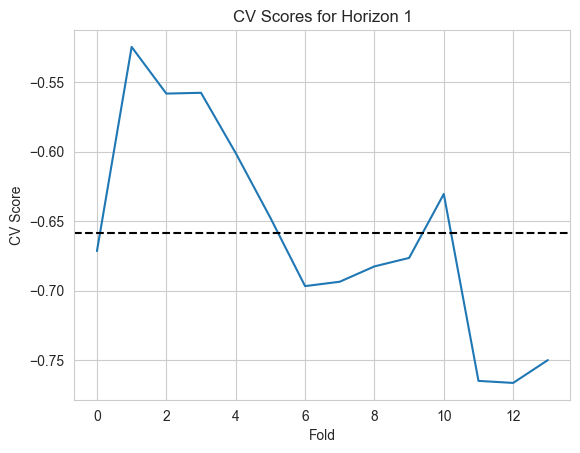

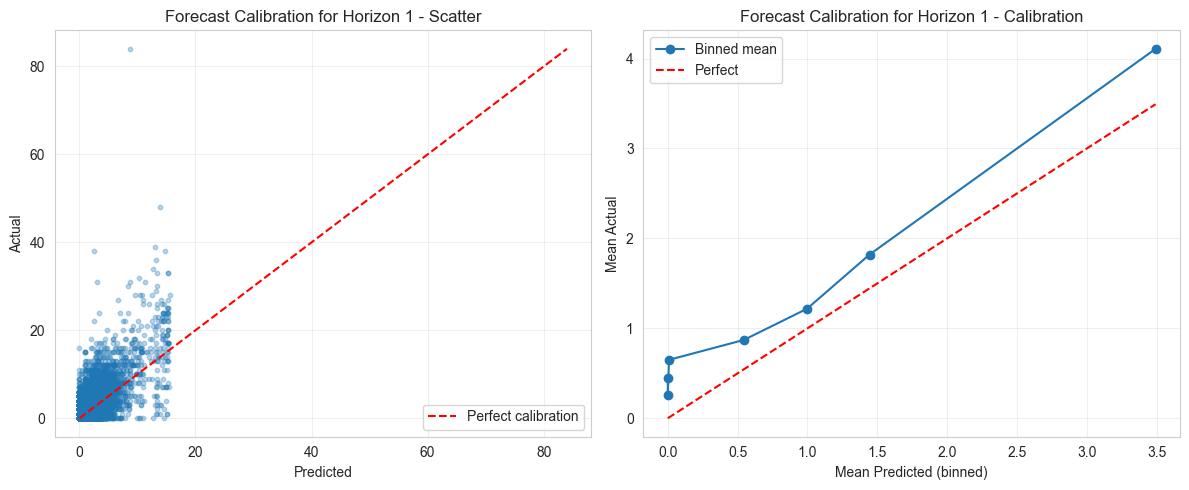

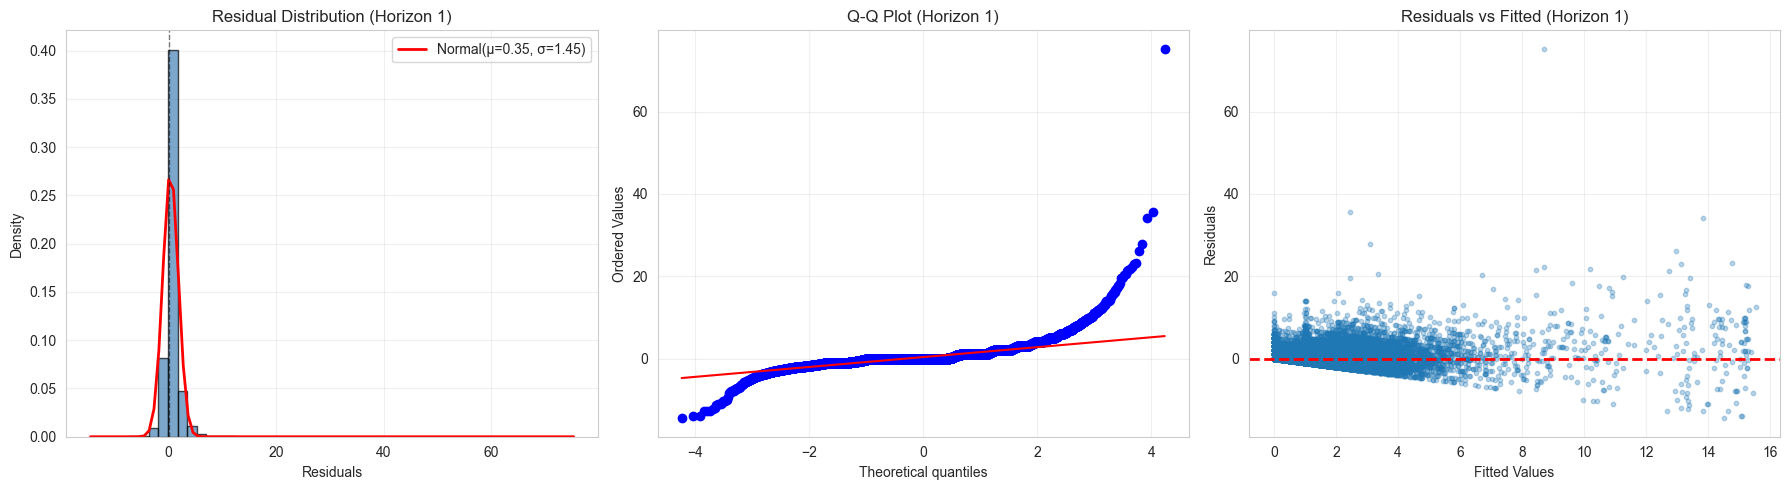


Horizon 1 - Residual Analysis
Residual Statistics:
  Mean: 0.3531
  Std Dev: 1.4527
  Median: 0.0000
  Skewness: 5.3020
  Kurtosis: 153.4601

Shapiro-Wilk Normality Test (n=5000):
  Statistic: 0.7169
  P-value: 2.4930e-68
  Interpretation: Residuals are NOT normally distributed (α=0.05)

Anderson-Darling Normality Test:
  Statistic: 5170.1818
  Critical Values: [0.576 0.656 0.787 0.918 1.092]
  Significance Levels: [15.  10.   5.   2.5  1. ]%

------------------------------------------------------------
Model Performance Metrics:
{'train': {'horizon': 1, 'rmse': 1.2558660214449686, 'mae': 0.649702876176111, 'poisson_deviance': 6.38447074515923, 'n_samples': 487161}, 'test': {'horizon': 1, 'rmse': 1.494952590498908, 'mae': 0.7343585002624405, 'poisson_deviance': 6.537413442385322, 'n_samples': 60374}}



In [11]:
reload(forecast)
forecast.evaluate_models(bundle_50)

### Evaluate 10th Percentile Models

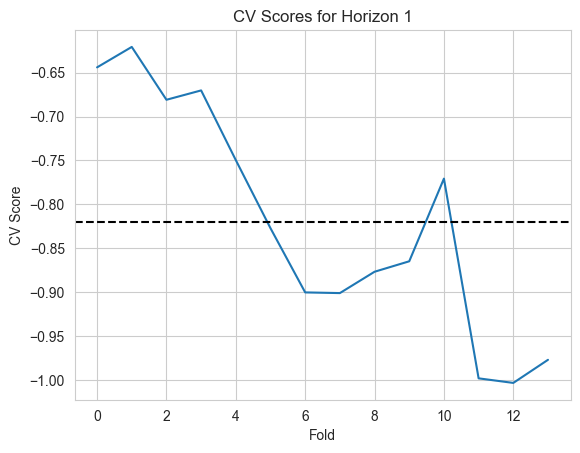

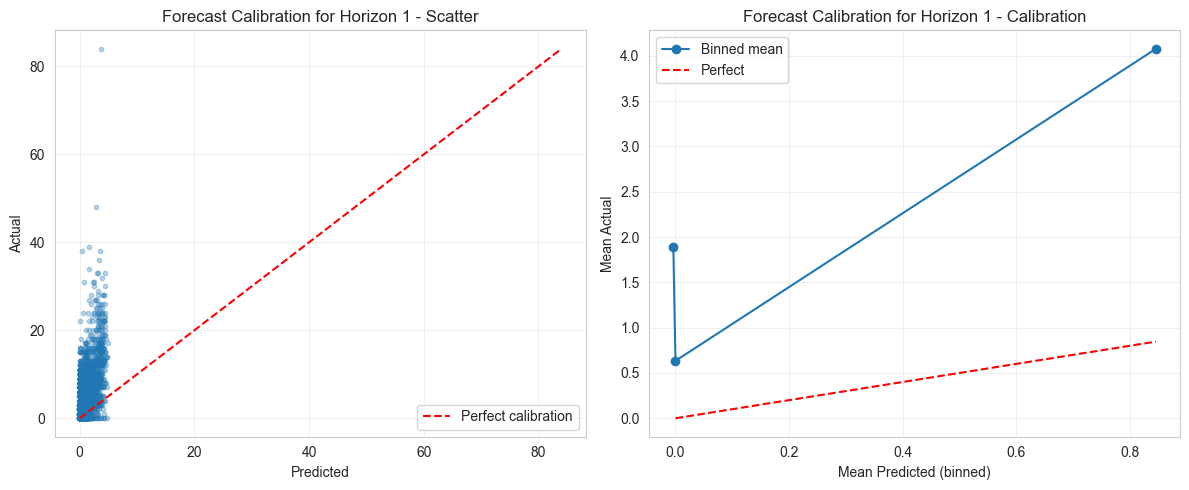

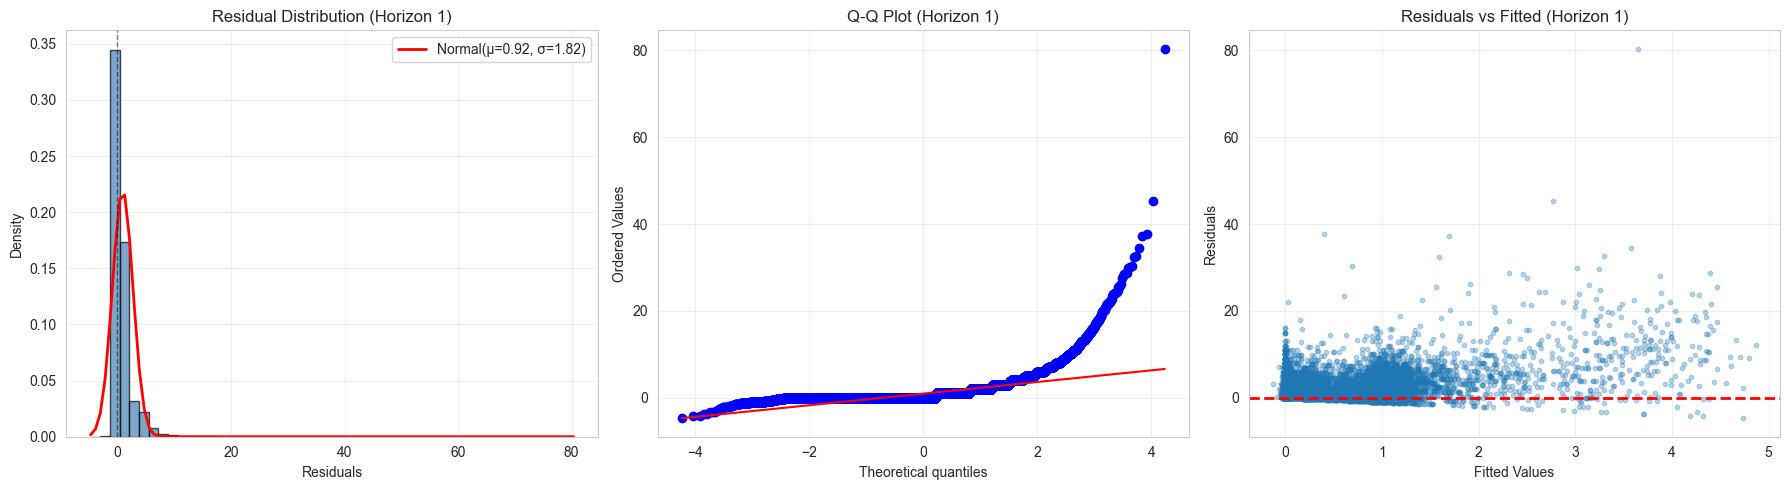


Horizon 1 - Residual Analysis
Residual Statistics:
  Mean: 0.9173
  Std Dev: 1.8160
  Median: 0.0000
  Skewness: 6.1542
  Kurtosis: 107.7887

Shapiro-Wilk Normality Test (n=5000):
  Statistic: 0.4382
  P-value: 1.0880e-82
  Interpretation: Residuals are NOT normally distributed (α=0.05)

Anderson-Darling Normality Test:
  Statistic: 7671.0282
  Critical Values: [0.576 0.656 0.787 0.918 1.092]
  Significance Levels: [15.  10.   5.   2.5  1. ]%

------------------------------------------------------------
Model Performance Metrics:
{'train': {'horizon': 1, 'rmse': 1.6861551837825577, 'mae': 0.8281197098799572, 'poisson_deviance': 25.252138759513404, 'n_samples': 487161}, 'test': {'horizon': 1, 'rmse': 2.03447688009069, 'mae': 0.9302382379257298, 'poisson_deviance': 26.02643769912639, 'n_samples': 60374}}



In [12]:
reload(forecast)
forecast.evaluate_models(bundle_10)